## Ising Model

The magnetization of a magnetic material is made up of the combination of many small magnetic dipoles spread throughout the material. If these dipoles point in random direction then the overall magnetization of the system is zero. If they line up so that all or most of them point in the same direction, then the system can acquire a macroscopic magnetic moment -- it becomes magnetized.  
In the Ising model, the spins themselves are restricted to point in only two directions, up and down. Although dipole in real magnets can point in any direction, this simple model allows us to capture important physics in a simplistic setting.  
In ferromagnetic materials, adjacent dipoles may interact magnetically and settle into a state that is energetically favorable. Assuming that the spins only interact with those that are immediately adjacent to them on the lattice, gives a total energy for the entire system equal to 
$$ E = -J\sum_{\langle ij\rangle}s_is_j $$
where the notation $\langle ij\rangle$ indicates a sum over pairs $i$, $j$ that are adjacent on the lattice.

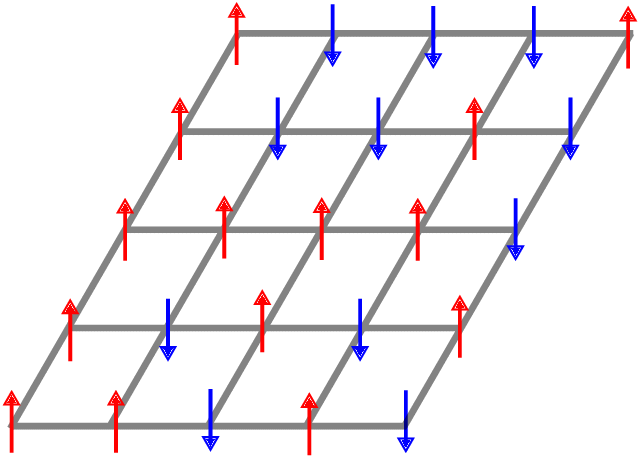

Let us perform a Markov Chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20$\times$20 spins, with the positive interaction constant, $J=1$ and temperature $T=1$, in units where the Boltzmann constant $k_B=1$.
* Initially, set the spin variables randomly to $\pm1$, so that on an average half of them are up, and half are down, giving a total magnetization of zero.
* Then choose a spin at random, flip it, and calculate the new energy after it is flipped.
* Then decide whether to accept the flip -- assume a simple Boltzmann statistics, as in an ideal gas.
* If the spin is reject, flip the spin back to its original state, and repeat.
* The total magnetization in each step is calculated as
$$ M = \sum_i s_i $$

The system will eventually assume a "spontaneous magnetization", or a nonzero value of the overall magnetization.

Text(0, 0.5, 'M')

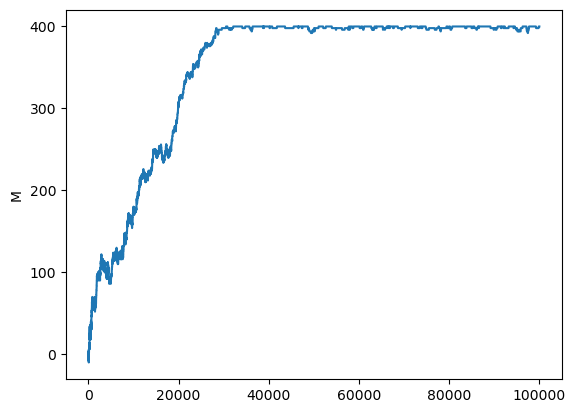

In [1]:
from pylab import *
from numpy.random import *

seed(5)

N = 20
J = 1
T = 1
kb = 1
beta = 1
steps = 100000

s = empty((N,N),int)

for i in range(N):
    for j in range(N):
        if random()<0.5:
            s[i,j]=1
        else:
            s[i,j]=-1

def energy(s):

    s1 = s[:-1,:]*s[1:,:]
    s2 = s[:,:-1]*s[:,1:]

    E = -J*(sum(s1) + sum(s2))

    return E

def energy_check(s):

    I = 0
    for i in range(N-1):
        for j in range(N):
            I+=s[i,j]*s[i+1,j]

    for i in range(N):
        for j in range(N-1):
            I+=s[i,j]*s[i,j+1]

    return -J*I

Mplot = []
E1 = energy(s)
M  = sum(s)
for k in range(steps):
    i = randint(N)
    j = randint(N)

    s[i,j] *=-1

    E2 = energy(s)

    dE = E2 - E1
    
    if dE>0:
        if random()<exp(-beta*dE):
            E1 = E2     # flip is acepted
            M = sum(s)
        else:
            s[i,j]*=-1  # flip rejected, revert to previous spin state
    else:
        E1 = E2         # flip is accepted because energy falls
        M  = sum(s)

    Mplot.append(M)
    
plot(Mplot)
ylabel('M')

## The Traveling Salesman

One of the more recent applications of Monte Carlo methods is numerical optimization. Where common extrema finding algorithms fail in telling local extrema apart from global extrema, Monte Carlo methods can avoid such discrepancies by implementing an idea called **simulated annealing** borrowed again from statistical mechanics.  
One of the most famous optimization problems is the traveling salesman problem, which is an **NP-hard problem** (unusually difficult to solve computationally). We start by choosing $N$ city locations at random within a square of unit length on each side.  
Let us denote the position of city $i$ by the two-dimensional vector $\boldsymbol{r}_i=(x_i,y_i)$, with $\boldsymbol{r}_N=\boldsymbol{r}_0$, since the tour ends where it begins. Then the total distance travelled by the salesman over the whole tour is
$$ D = \sum_{i=0}^{N-1}|\boldsymbol{r}_{i+1}-\boldsymbol{r}_i| $$
We want to minimize this quantity over the set of all possible tours, i.e. over all possible choices of the order of the cities.

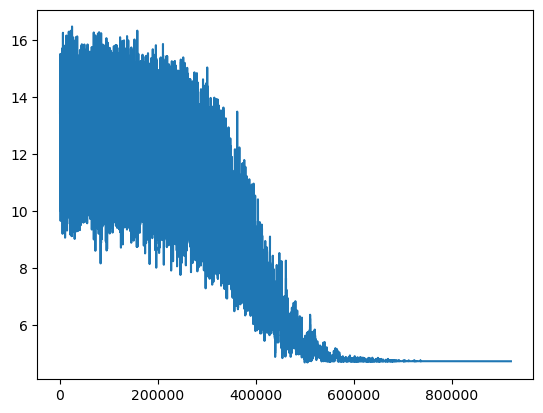

In [4]:
from math import sqrt,exp
from numpy import empty
from random import random,randrange

N = 25
Tmax = 10.0
Tmin = 1e-3
tau = 1e5

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Main loop
t = 0
T = Tmax
Dplot = []
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]     # swapping x values
    r[i,1],r[j,1] = r[j,1],r[i,1]     # swapping y values
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD
    
    Dplot.append(D)

plot(Dplot)

# Try it yourself

### Total 4 marks

Produce an animation of the evolution of the spin states of the above Ising model. You can designate two colors for spin states $\pm1$ and show the evolution on a density plot. You could also try something fancier like drawing arrows that change directions.